In [22]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

In [23]:
df_cust = pd.read_csv('data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
df_cat = pd.read_csv('data/product_category_name_translation.csv')

In [24]:
# Merging multiple DataFrames into a single DataFrame 'df' using left joins
df = pd.merge(df_orders, df_cust, on='customer_id', how='inner')
df = df.merge(df_order_items, on='order_id', how='left')
df = df.merge(df_sellers, on='seller_id', how='left')
df = df.merge(df_products, on='product_id', how='left')
df = df.merge(df_order_payments, on='order_id', how='left')
df = df.merge(df_order_reviews, on='order_id', how='left')

print('Merge Data Shape:',df.shape)
display(df.head(5))

Merge Data Shape: (119143, 39)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [25]:
df = df[['order_id', 'customer_unique_id', 'order_purchase_timestamp', 'payment_sequential', 'payment_value']].drop_duplicates()
df.head()

,order_id,customer_unique_id,order_purchase_timestamp,payment_sequential,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,3.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,1.0,179.12


In [26]:
df = df.groupby(['order_id', 'customer_unique_id', 'order_purchase_timestamp']).sum().reset_index()
df

,order_id,customer_unique_id,order_purchase_timestamp,payment_sequential,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,1.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,1.0,259.83
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,1.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,1.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,1.0,218.04
...,...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,1.0,343.40
99437,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14 10:26:46,1.0,386.53
99438,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23 17:07:56,1.0,116.85
99439,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14 23:02:59,1.0,64.71


In [27]:
# Define a function to generate a summary DataFrame of data characteristics
def skimming_data(data):
    # Create a DataFrame 'skimmed_data' with columns to capture various data characteristics
    skimmed_data = pd.DataFrame({
        'feature': data.columns.values,  # Column names
        'data_type': data.dtypes.values,  # Data types of columns
        'null_value(%)': data.isna().mean().values * 100,  # Percentage of missing values
        'neg_value(%)': [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of negative values for numeric columns
        '0_value(%)': [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of zero values for numeric columns
        'duplicate': data.duplicated().sum(),  # Number of duplicated rows
        'n_unique': data.nunique().values,  # Number of unique values for each column
        'sample_unique': [data[col].unique() for col in data.columns]  # Sample unique values for each column
    })
    
    # Round the values in the summary DataFrame to 3 decimal places
    return skimmed_data.round(3)

In [28]:
skimming_data(df)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.0,0.0,0.000,0,99441,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f..."
1,customer_unique_id,object,0.0,0.0,0.000,0,96096,"[871766c5855e863f6eccc05f988b23cb, eb28e67c4c0..."
2,order_purchase_timestamp,object,0.0,0.0,0.000,0,98875,"[2017-09-13 08:59:02, 2017-04-26 10:53:06, 201..."
3,payment_sequential,float64,0.0,0.0,0.001,0,23,"[1.0, 3.0, 21.0, 2.0, 6.0, 28.0, 10.0, 15.0, 4..."
4,payment_value,float64,0.0,0.0,0.004,0,27979,"[72.19, 259.83, 216.87, 25.78, 218.04, 34.59, ..."


In [29]:
df = df[df['payment_value']>0]
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.date
df.sort_values(by=['order_purchase_timestamp', 'order_id'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,order_id,customer_unique_id,order_purchase_timestamp,payment_sequential,payment_value
0,2e7a8482f6fb09756ca50c10d7bfc047,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04,1.0,136.23
1,e5fa5a7210941f7d56d0208e4e071d35,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05,1.0,75.06
2,809a282bbd5dbcabb6f2f724fca862ec,009b0127b727ab0ba422f6d9604487c7,2016-09-13,1.0,40.95
3,71303d7e93b399f5bcd537d124c0bcfa,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02,1.0,109.34
4,3b697a20d9e427646d92567910af6d57,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03,1.0,45.46
...,...,...,...,...,...
99432,392ed9afd714e3c74767d0c4d3e3f477,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29,1.0,137.03
99433,616fa7d4871b87832197b2a137a115d2,634420a0ea42302205032ed44ac7fccc,2018-10-01,1.0,80.38
99434,a2ac6dad85cf8af5b0afb510a240fe8c,af5454198a97379394cacf676e1e96cb,2018-10-03,1.0,197.55
99435,b059ee4de278302d550a3035c4cdb740,262e1f1e26e92e86375f86840b4ffd63,2018-10-16,1.0,222.03


In [30]:
max_day = df['order_purchase_timestamp'].max() + datetime.timedelta(days=1)

df_rfm = df.groupby('customer_unique_id').agg(
    recency = ('order_purchase_timestamp', lambda x: (max_day - x.max()).days),
    frequency = ('order_id', lambda x: x.nunique()),
    monetary = ('payment_value', 'sum')
).reset_index()

df_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,587,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,371,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,338,1,196.89
...,...,...,...,...
96088,fffcf5a5ff07b0908bd4e2dbc735a684,497,1,2067.42
96089,fffea47cd6d3cc0a88bd621562a9d061,312,1,84.58
96090,ffff371b4d645b6ecea244b27531430a,618,1,112.46
96091,ffff5962728ec6157033ef9805bacc48,169,1,133.69


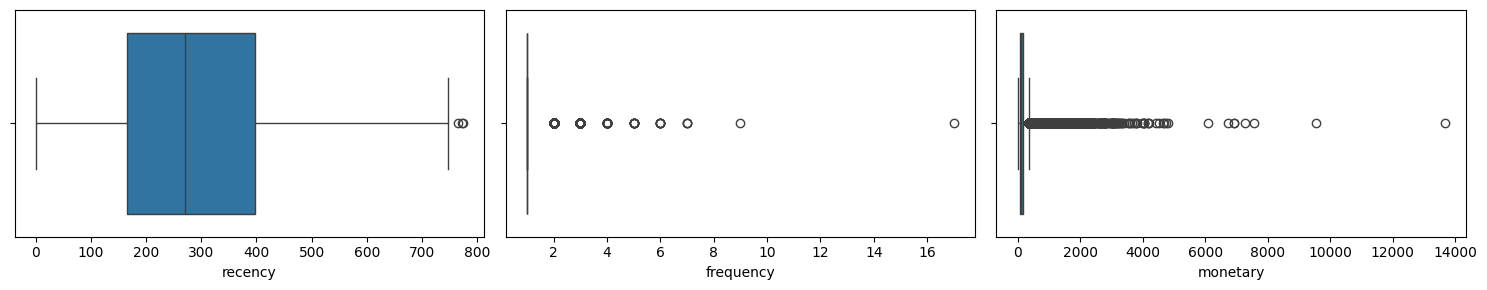

In [31]:
# Plotting oulier for numerical columns
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
index = 0
axs = axs.flatten()
for col, val in df_rfm.select_dtypes(include=[np.number]).items():
    sns.boxplot(x=col, data=df_rfm, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

In [32]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in df_rfm.select_dtypes(include=[np.number]).columns:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df_rfm, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round((total_outlier / len(df_rfm[column])) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_data = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_data

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,recency,3,0.00,-184.50,747.50
1,frequency,2996,3.12,1.00,1.00
2,monetary,7656,7.97,-117.47,364.13


In [34]:
scaler = RobustScaler()

rfm_scaled = pd.DataFrame(
    data=scaler.fit_transform(df_rfm[["recency", "frequency", "monetary"]]), 
    columns=["recency", "frequency", "monetary"]
)

rfm_sample = rfm_scaled.sample(frac=0.02, random_state=42)
rfm_sample

,recency,frequency,monetary
36909,0.875536,0.0,-0.613870
29005,0.532189,0.0,-0.528738
72669,1.343348,0.0,-0.270432
26894,-0.802575,0.0,-0.186877
25782,-0.716738,0.0,-0.332724
...,...,...,...
55489,0.248927,0.0,-0.356395
46324,-0.266094,0.0,-0.450000
19757,-0.287554,0.0,0.511794
10548,0.055794,0.0,-0.663787


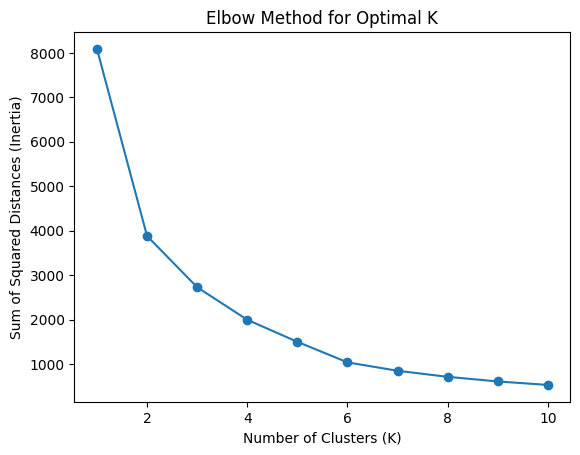

In [37]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    # Create a KMeans instance with the desired number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model
    kmeans.fit(rfm_sample[['recency', 'monetary']])

    # Calculate the sum of squared distances for values of K
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

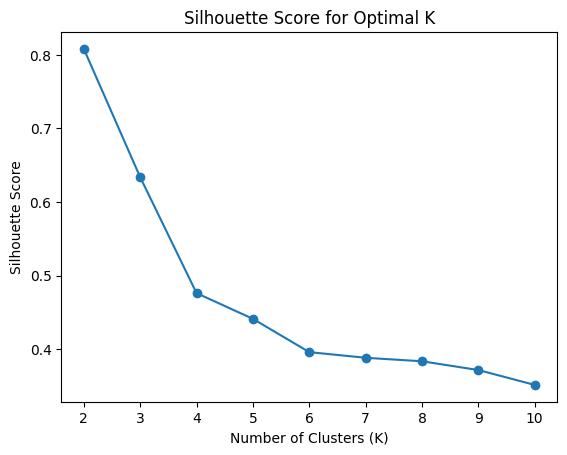

In [40]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    # Create a KMeans instance with the desired number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Make prediction
    labels = kmeans.fit_predict(rfm_sample)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(rfm_sample, labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

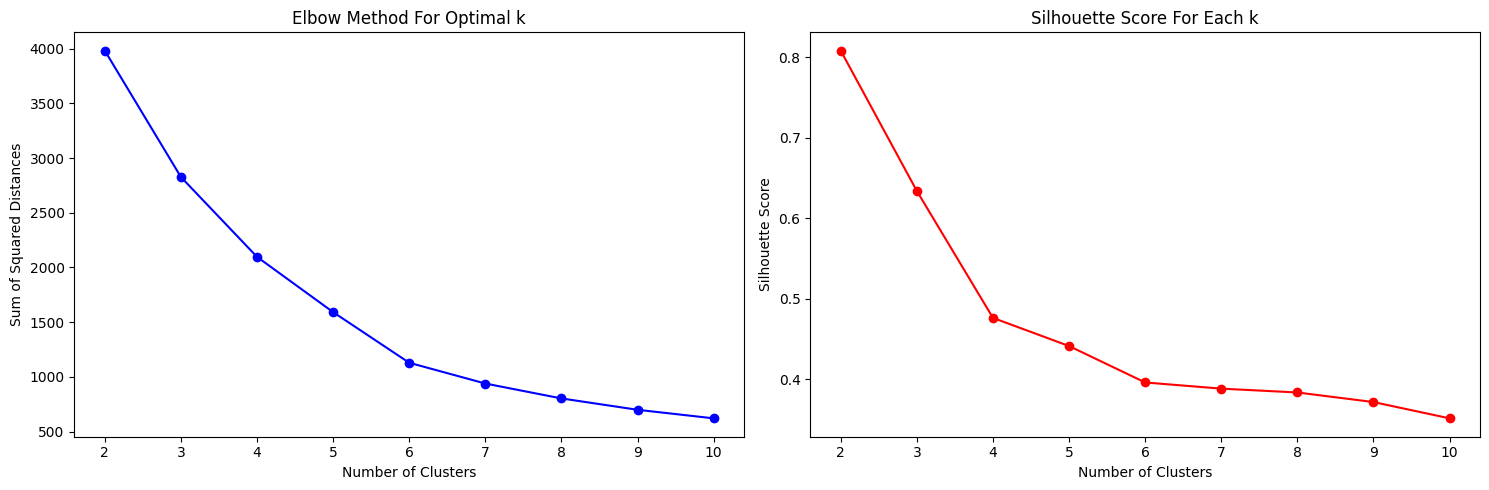

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List to store the results of the Elbow method and Silhouette scores
elbow_results = []
silhouette_results = []

# Range of potential clusters
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(rfm_sample)
    
    # The average silhouette_score gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(rfm_sample, cluster_labels)
    silhouette_results.append(silhouette_avg)
    
    # The total sum of squared distances of samples to their closest cluster center
    elbow_results.append(clusterer.inertia_)

# Elbow method plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, elbow_results, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_results, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Each k')

plt.tight_layout()
plt.show()

In [54]:
# Apply K-means algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict the cluster label for each point
labels = kmeans.fit_predict(rfm_sample)

# Find the center of each cluster
centroids = kmeans.cluster_centers_

# Add the cluster labels to your DataFrame
rfm_sample['cluster'] = labels

import plotly.express as px

# Create the interactive 3D plot
fig = px.scatter_3d(rfm_sample, x='recency', y='frequency', z='monetary', color='cluster',
                    labels={'cluster': 'Cluster'}, title='3D K-means Clustering Results with Normalized RFM')
fig.update_traces(marker=dict(size=5))
fig.show()